In [51]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [66]:
df=pd.read_csv(r'C:\Users\Gaurav\OneDrive\Desktop\codsoft\titsnic.ipynb\titanic_cleaned_data_csv')

In [67]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
Sex_encoded         0
Embarked_encoded    0
dtype: int64

In [68]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Sex_encoded',
       'Embarked_encoded'],
      dtype='object')

In [69]:
x=df.drop(['Name','Ticket','Survived','Sex','Embarked','PassengerId'],axis=1)
y=df['Survived']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
x_train.value_counts()

Pclass  Age        SibSp  Parch  Fare     Sex_encoded  Embarked_encoded
3       29.699118  0      0      7.8958   1            2                   11
                                 8.0500   1            2                   10
                                 7.7500   1            1                    8
                                          0            1                    6
                                 7.2292   1            0                    6
                                                                           ..
2       27.000000  0      0      10.5000  0            2                    1
                                 13.0000  1            2                    1
                                 26.0000  1            2                    1
                   1      0      13.8583  0            0                    1
3       74.000000  0      0      7.7750   1            2                    1
Name: count, Length: 611, dtype: int64

In [72]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [73]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [74]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
331,1,45.5,0,0,28.5000,1,2
733,2,23.0,0,0,13.0000,1,2
382,3,32.0,0,0,7.9250,1,2
704,3,26.0,1,0,7.8542,1,2
813,3,6.0,4,2,31.2750,0,2


In [75]:
print(x_train_scaled)

[[-1.61413602  1.22920747 -0.47072241 ... -0.07868358  0.7243102
   0.5635246 ]
 [-0.40055118 -0.50350514 -0.47072241 ... -0.37714494  0.7243102
   0.5635246 ]
 [ 0.81303367  0.18957991 -0.47072241 ... -0.47486697  0.7243102
   0.5635246 ]
 ...
 [ 0.81303367  0.88266495  1.23056874 ... -0.35580399  0.7243102
   0.5635246 ]
 [-1.61413602 -1.19659018  0.37992316 ...  1.68320121 -1.38062393
   0.5635246 ]
 [-1.61413602 -0.65752403 -0.47072241 ...  0.86074761  0.7243102
   0.5635246 ]]


In [76]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
Sex_encoded         0
Embarked_encoded    0
dtype: int64

<Axes: >

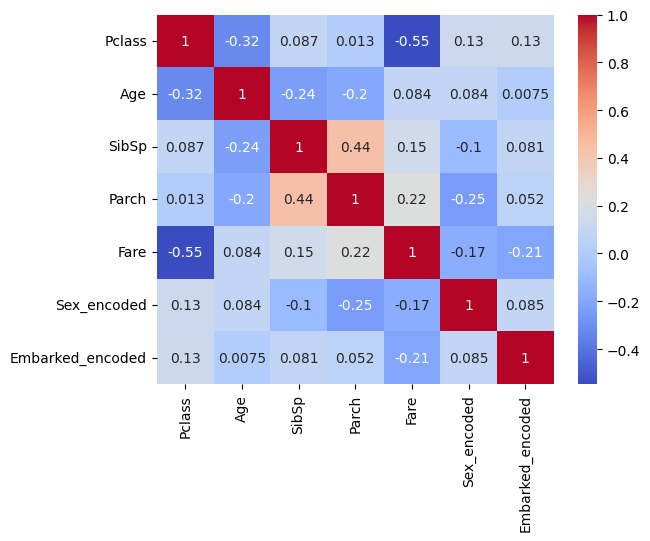

In [77]:
sns.heatmap(x_train.corr(),annot=True,cmap="coolwarm")

Text(0.5, 1.0, 'x_train after scaling')

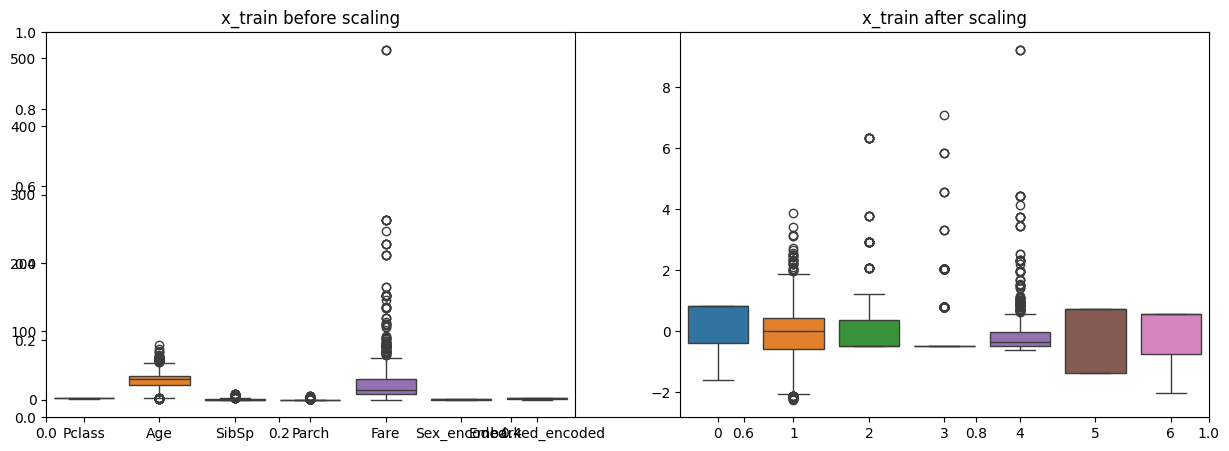

In [78]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')

In [80]:
from  sklearn.linear_model import LinearRegression
from  sklearn.tree  import DecisionTreeRegressor;
from  sklearn.linear_model import LogisticRegression;
from sklearn.metrics import mean_absolute_error, r2_score;

In [89]:
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)


mean_absolute_error 0.28557424944397836
r2_score 0.4350187192324194


In [84]:
dt=DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)
y_pred=dt.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)

mean_absolute_error 0.3687150837988827
r2_score -0.5204633204633204


In [87]:
log=LogisticRegression()
log.fit(x_train_scaled,y_train)
y_pred=log.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)

mean_absolute_error 0.18994413407821228
r2_score 0.2167310167310167


In [90]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(log,open('logistic.pkl','wb'))